# Example notebook on Wine dataset for Phase 2 - Data Provisioning

## Introduction

This notebook describes the main steps to take and consider in order to complete the Data Provisioning phase, comprising 4 steps. The questions below are answered in these 4 steps:
    
- What requirements does your data has to meet in order to be able to make a prediction (determine your target variable first) based on the dataset?
- How do you get your data? How is your data stored and is it accessible (also in the future)?
- Do you understand your data? Can you explain all the feature and instances (colummns and rows)? Can you visualize the charateristics of the data (also to others)?
- What transformations or preparations are needed to make sure the data(set) is ready to be 'fed into' a ML model?
    

## (from Phase 1) Data Sourcing

In phase 1 the Data Sourcing steps is meant to see if there is a suitable data source for the AI-project. This source is considered to contain, generate or stream the data needed to predict the target variable, using one or multiple machine learning algorithms/models. 

In this case, the source is already known and provided, but it is still advised to assess the origin of the data. Often, additional information about the dataset is provided. In this case you can find more information on the website of the UCI (University of California, Irvine) and in the Data Set Description file 'wines.names' (text file).

https://archive.ics.uci.edu/dataset/109/wine

# Phase 2 Data Provisioning

## Data requirements

The first step Data Requirements is mainly about what information is necessary to realise or support the goal of your project (what are you trying to predict or analyse?).

### Required data elements


In [1]:
#often no actual actions in Python are required in this step... 
#first set the requirements before collect/find the data...

A starting point to defining required data elements is to look at the target variable. Does  this variable have specific units, measures, ranges, ...? In this case, the author states in the description that these data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. This is shown in the data in the first column (class) containing either value 1, 2 or 3. That means the data is labeled, something that is required for the choosen classification model. 

Besides the label, we need other characteristics of wines for classifying. I know wine contains alcohol, but in this case there is no need to think about more detailed and specific features, as there is a nice list of variables, as a result of the chemical analysis.



### Data definition

A list of features is provided, but it contains a lot of chemical or domain-specific terms. All this data resulted from a chemical analysis done on the wines grown in the same region of Italy, but are derived from 3 different cultivars (a plant variety that has been produced in cultivation by selective breeding). It is also the case this this datset probably had 30 instead 13 variables to begin with, but for some unknown reason 17 where lost, according to the creator of this dataset.

Additionally, I have added some explanation on the meaning of the variables.

(0) class: There are 3 classes, representing the 3 different cultivars.

(1) Alcohol - The average glass of wine contains about 11 percent to 13 percent alcohol, but bottles range from as little as 5.5 percent ABV to as much as around 20 percent ABV (source: https://www.realsimple.com/holidays-entertaining/entertaining/food-drink/alcohol-content-wine)

(2) Malic acid: It is a kind of acid with strong acidity and apple aroma. The red wine is naturally accompanied by malic acid. 

(3) Ash: The essence of ash is an inorganic salt, which has an effect on the overall flavor of the wine and can give the wine a fresh feeling. 

(4) Alkalinity of ash: It is a measure of weak alkalinity dissolved in water.

(5) Magnesium: It is an essential element of the human body, which can promote energy metabolism and is weakly alkaline.

(6) Total phenols: molecules containing polyphenolic substances, which have a bitter taste and affect the taste, color and taste of the wine, and belong to the nutrients in the wine.

(7) Flavanoids: It is a beneficial antioxidant for the heart and anti-aging, rich in aroma and bitter.

(8) Nonflavanoid phenols: It is a special aromatic gas with oxidation resistance and is weakly acidic. 

(9) Proanthocyanins: It is a bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell. 

(10) Color intensity: refers to the degree of color shade. It is used to measure the style of wine to be “light” or “thick”. The color intensity is high, meanwhile the longer the wine and grape juice are in contact during the wine making process, the thicker the taste.

(11) Hue: refers to the vividness of the color and the degree of warmth and coldness. It can be used to measure the variety and age of the wine. Red wines with higher ages will have a yellow hue and increased transparency. Color intensity and hue are important indicators for evaluating the quality of a wine's appearance.

(12) OD280/OD315 of diluted wines: This is a method for determining the protein concentration, which can determine the protein content of various wines.

(13) Proline: It is the main amino acid in red wine and an important part of the nutrition and flavor of wine.

Often a dataset is already provided, but one should look beyond the given data and features. Data requirements can also address data elements that are not part of a given dataset. 
In this case, as I'm no expert on wines, the data is entirely numerical, so my additional requirements  would be that these wines would also have a name/title, names of grape(s) used, or other readable notes, so it is a little bit easier to understand what we're talking about.  Furthermore, I don't know how accurate or old this data is, the chemical analysis might performed on a very outdated machine, or maybe it's results are not even real (plainly generatated). These can also be requirements (although we know it will not going to be in the data, as the dataset is already given and very limited). 


## Data Collection

This data is available at the site of UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/109/wine. I have downloaded the dataset as a csv file. 

In [2]:
#Import libraries
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Read the data. Know that there are many useful parameter to improve/optimize the way the data is being read
# into a dataframe. You can define the delimiter or decimal character, to get correct data values.
winedata = pd.read_csv('wine/wine.data', header=None)
winedata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Giving the columns names (of the features) makes it much more clear and readable (names available at the website)
winedata.columns= ['class','alcohol','malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids','nonflavanoid phenols','proanthocyanins','color intersity','hue','OD280/OD315 of diluted wines','proline']
winedata.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intersity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The dataset is not likely to change, so I will keep not a version or change record. 

## Data Understanding


### Exploratory Data Analysis



In [5]:
# Start with looking at some general statistics of the features. In this case all values are numerical, in order
# to get statistics on categorical data, you need to add the 'include' parameter.
winedata.describe()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intersity,hue,OD280/OD315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We can start with checking (scanning) the general features of the dataset. There are 177 lines of data, and each feature has its specific characteristics. 

As a first attempt to improve the data requirements, I have tried to add units and ranges to the data definition. It can also help to check the consistency and validity of the data.

(0) class: in this case, there are 3 classes, indicated by [1, 2, 3]. 

(1) Alcohol - in the dataset everything is between 11 and 15. which falls in the unfortified wines category of the ABV.

(2) Malic acid: Ranges between 0,74 and 5,8. After a bit of research on malic acid in wines, the common range appears to be 0-8 (according to https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity).

(3) Ash: It normally lays between 1.3 and 3.5 and in our data it does as well [1,36-3,23] (source: https://www.institut-heidger.de/ash-gravimetric-calculated-from-minerals-alkalinity-of-ash/?lang=en)

(4) Alkalinity of ash: Our data ranged from 10.6 to 30. The alkalinity of ash is expressed in milliequivalents per litre or in grams per litre of potassium carbonate (source: https://www.institut-heidger.de/ash-gravimetric-calculated-from-minerals-alkalinity-of-ash/?lang=en).

(5) Magnesium: Typically these values range between 50-200 and in this case it is between 70 and 162.

(6) Total phenols: Our data ranges from 0.98 to 3.88.

(7) Flavanoids: Our data ranges from 0.34 to 5.08,

(8) Nonflavanoid phenols: Our data ranges from 0.13 to 0.66.

(9) Proanthocyanins: Our data ranges from 0.41 to 3.58

(10) Color intensity: Our data ranges from 1.28 to 13

(11) Hue: Our data ranges from 0.48 to 1.71

(12) Our data ranges from 1.27 to 4

(13) Proline: Our data ranges from 278 to 1680

In [6]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity of ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color intersity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  proli

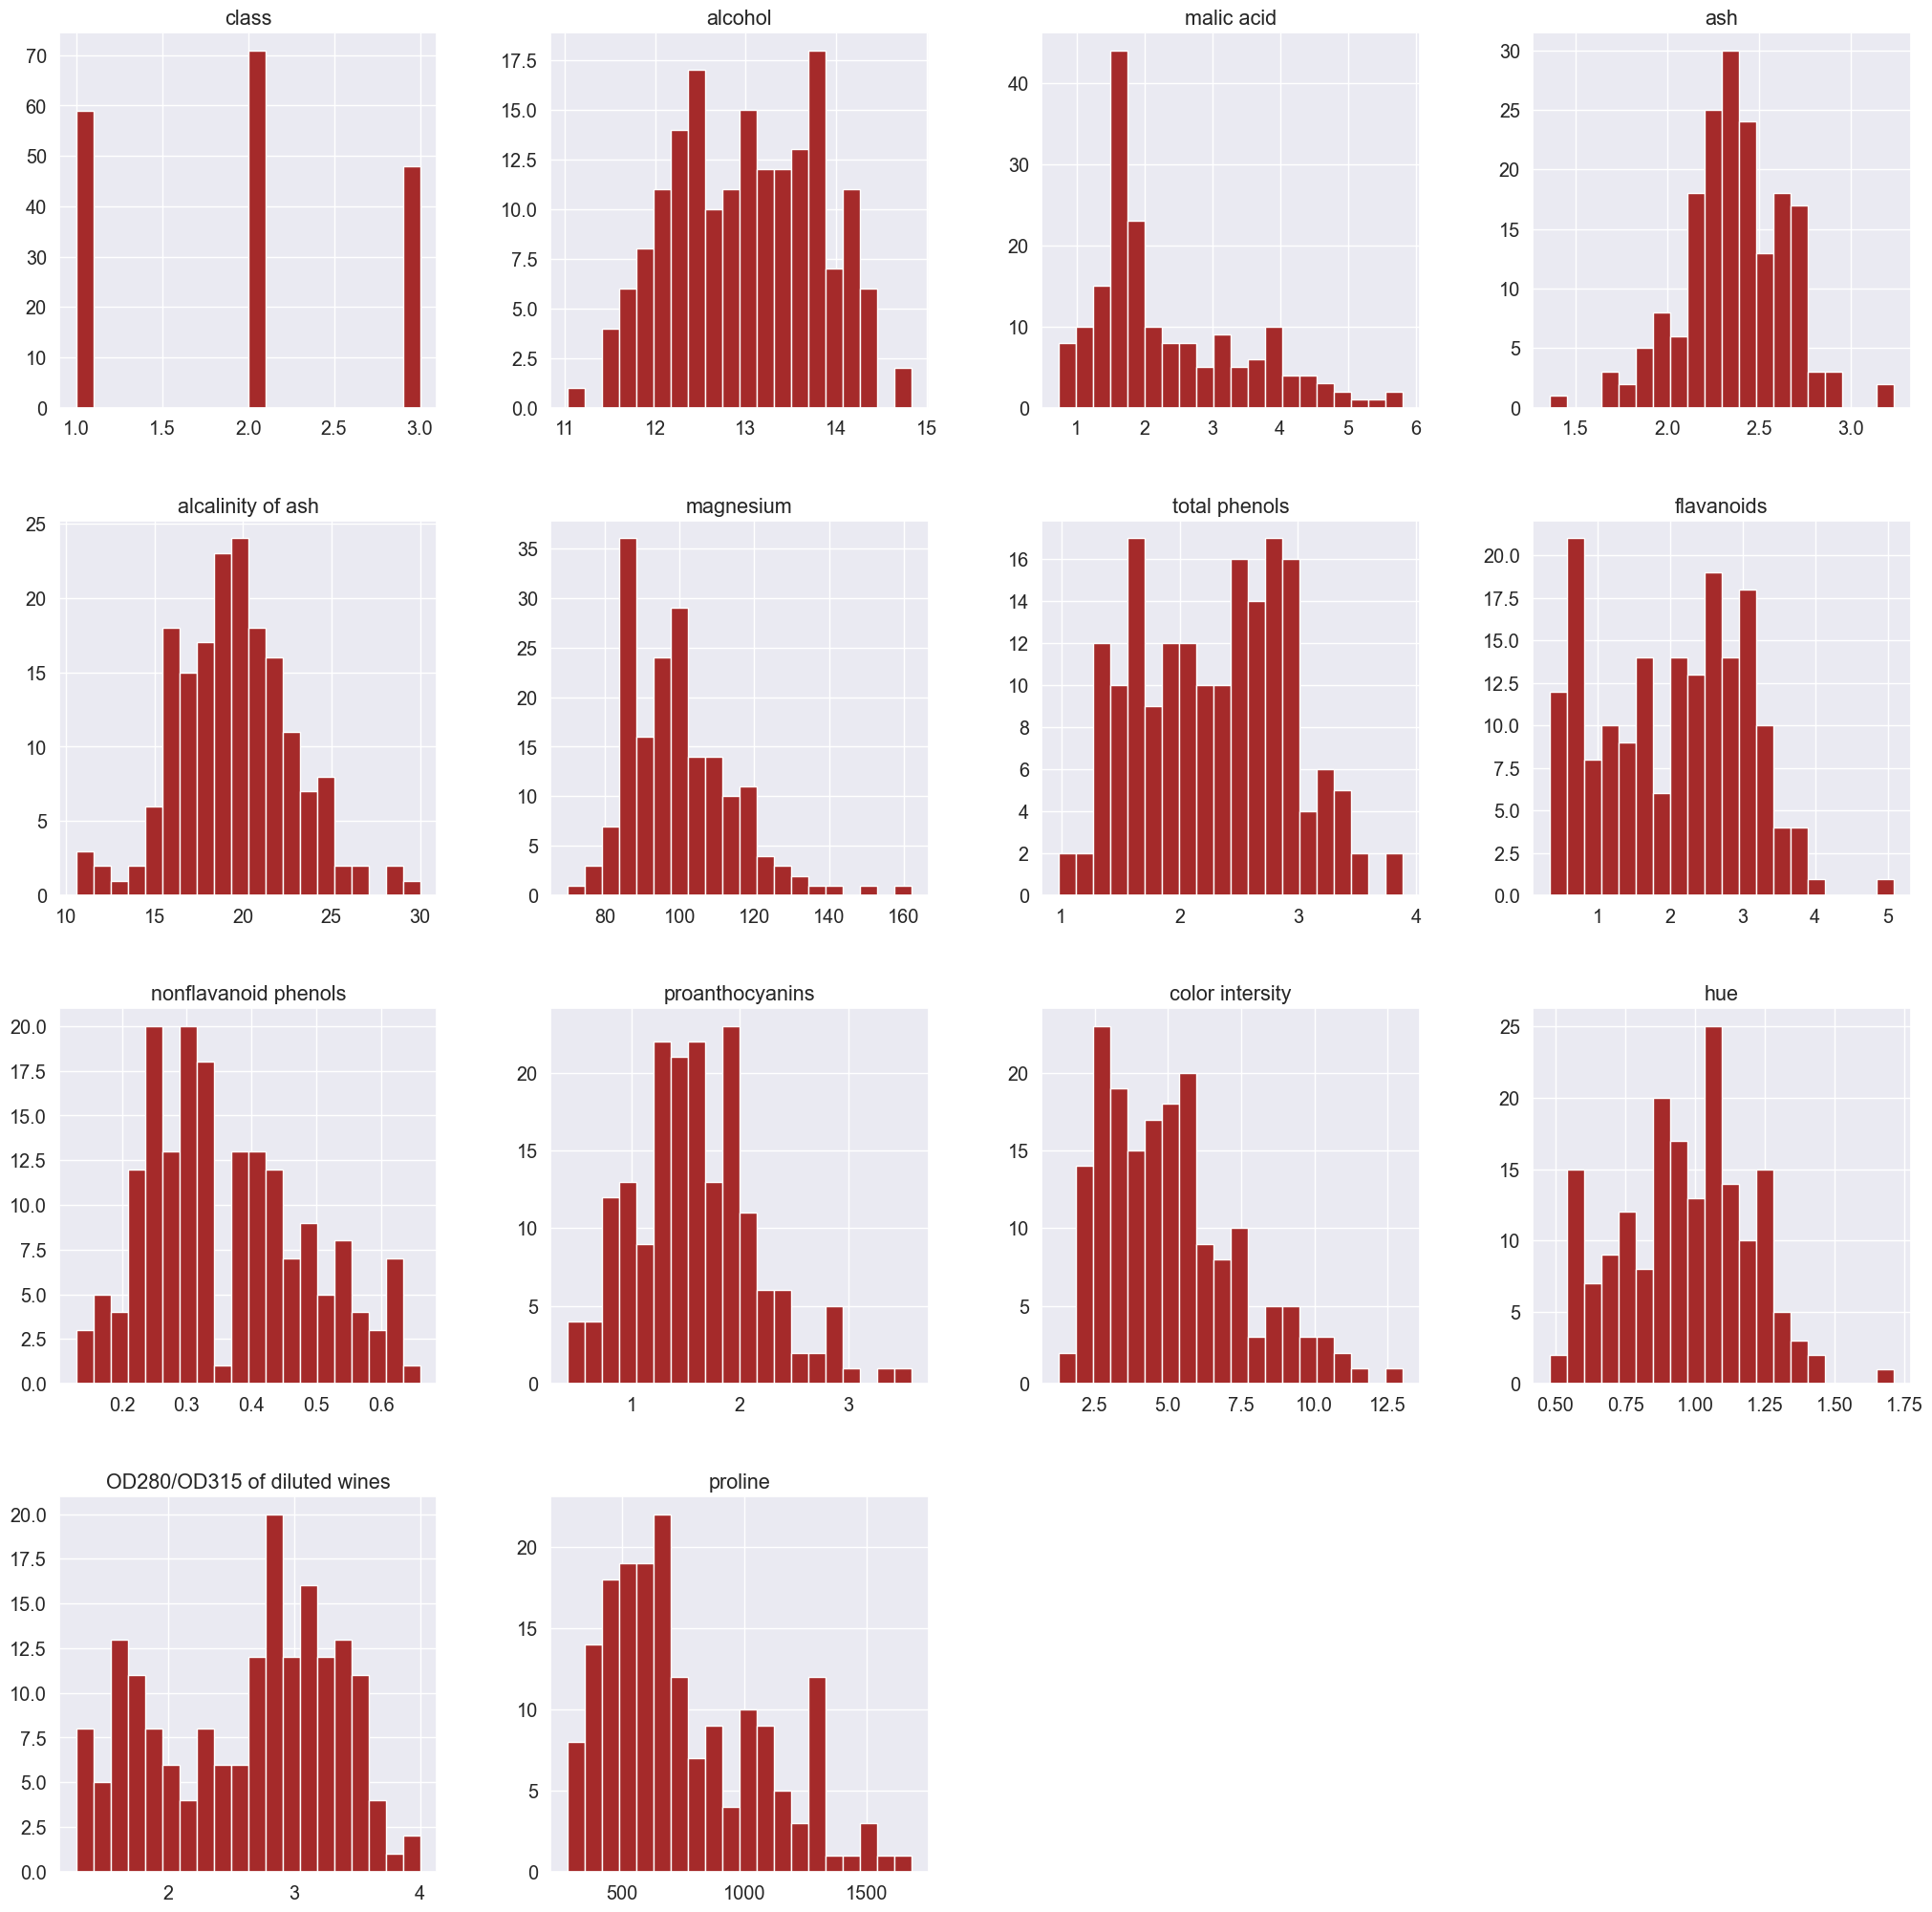

In [7]:
#visualising the data elements (features)
sns.set(style='darkgrid',font_scale=1.3, rc={'figure.figsize':(25,25)})
ax=winedata.hist(bins=20,color='brown' )


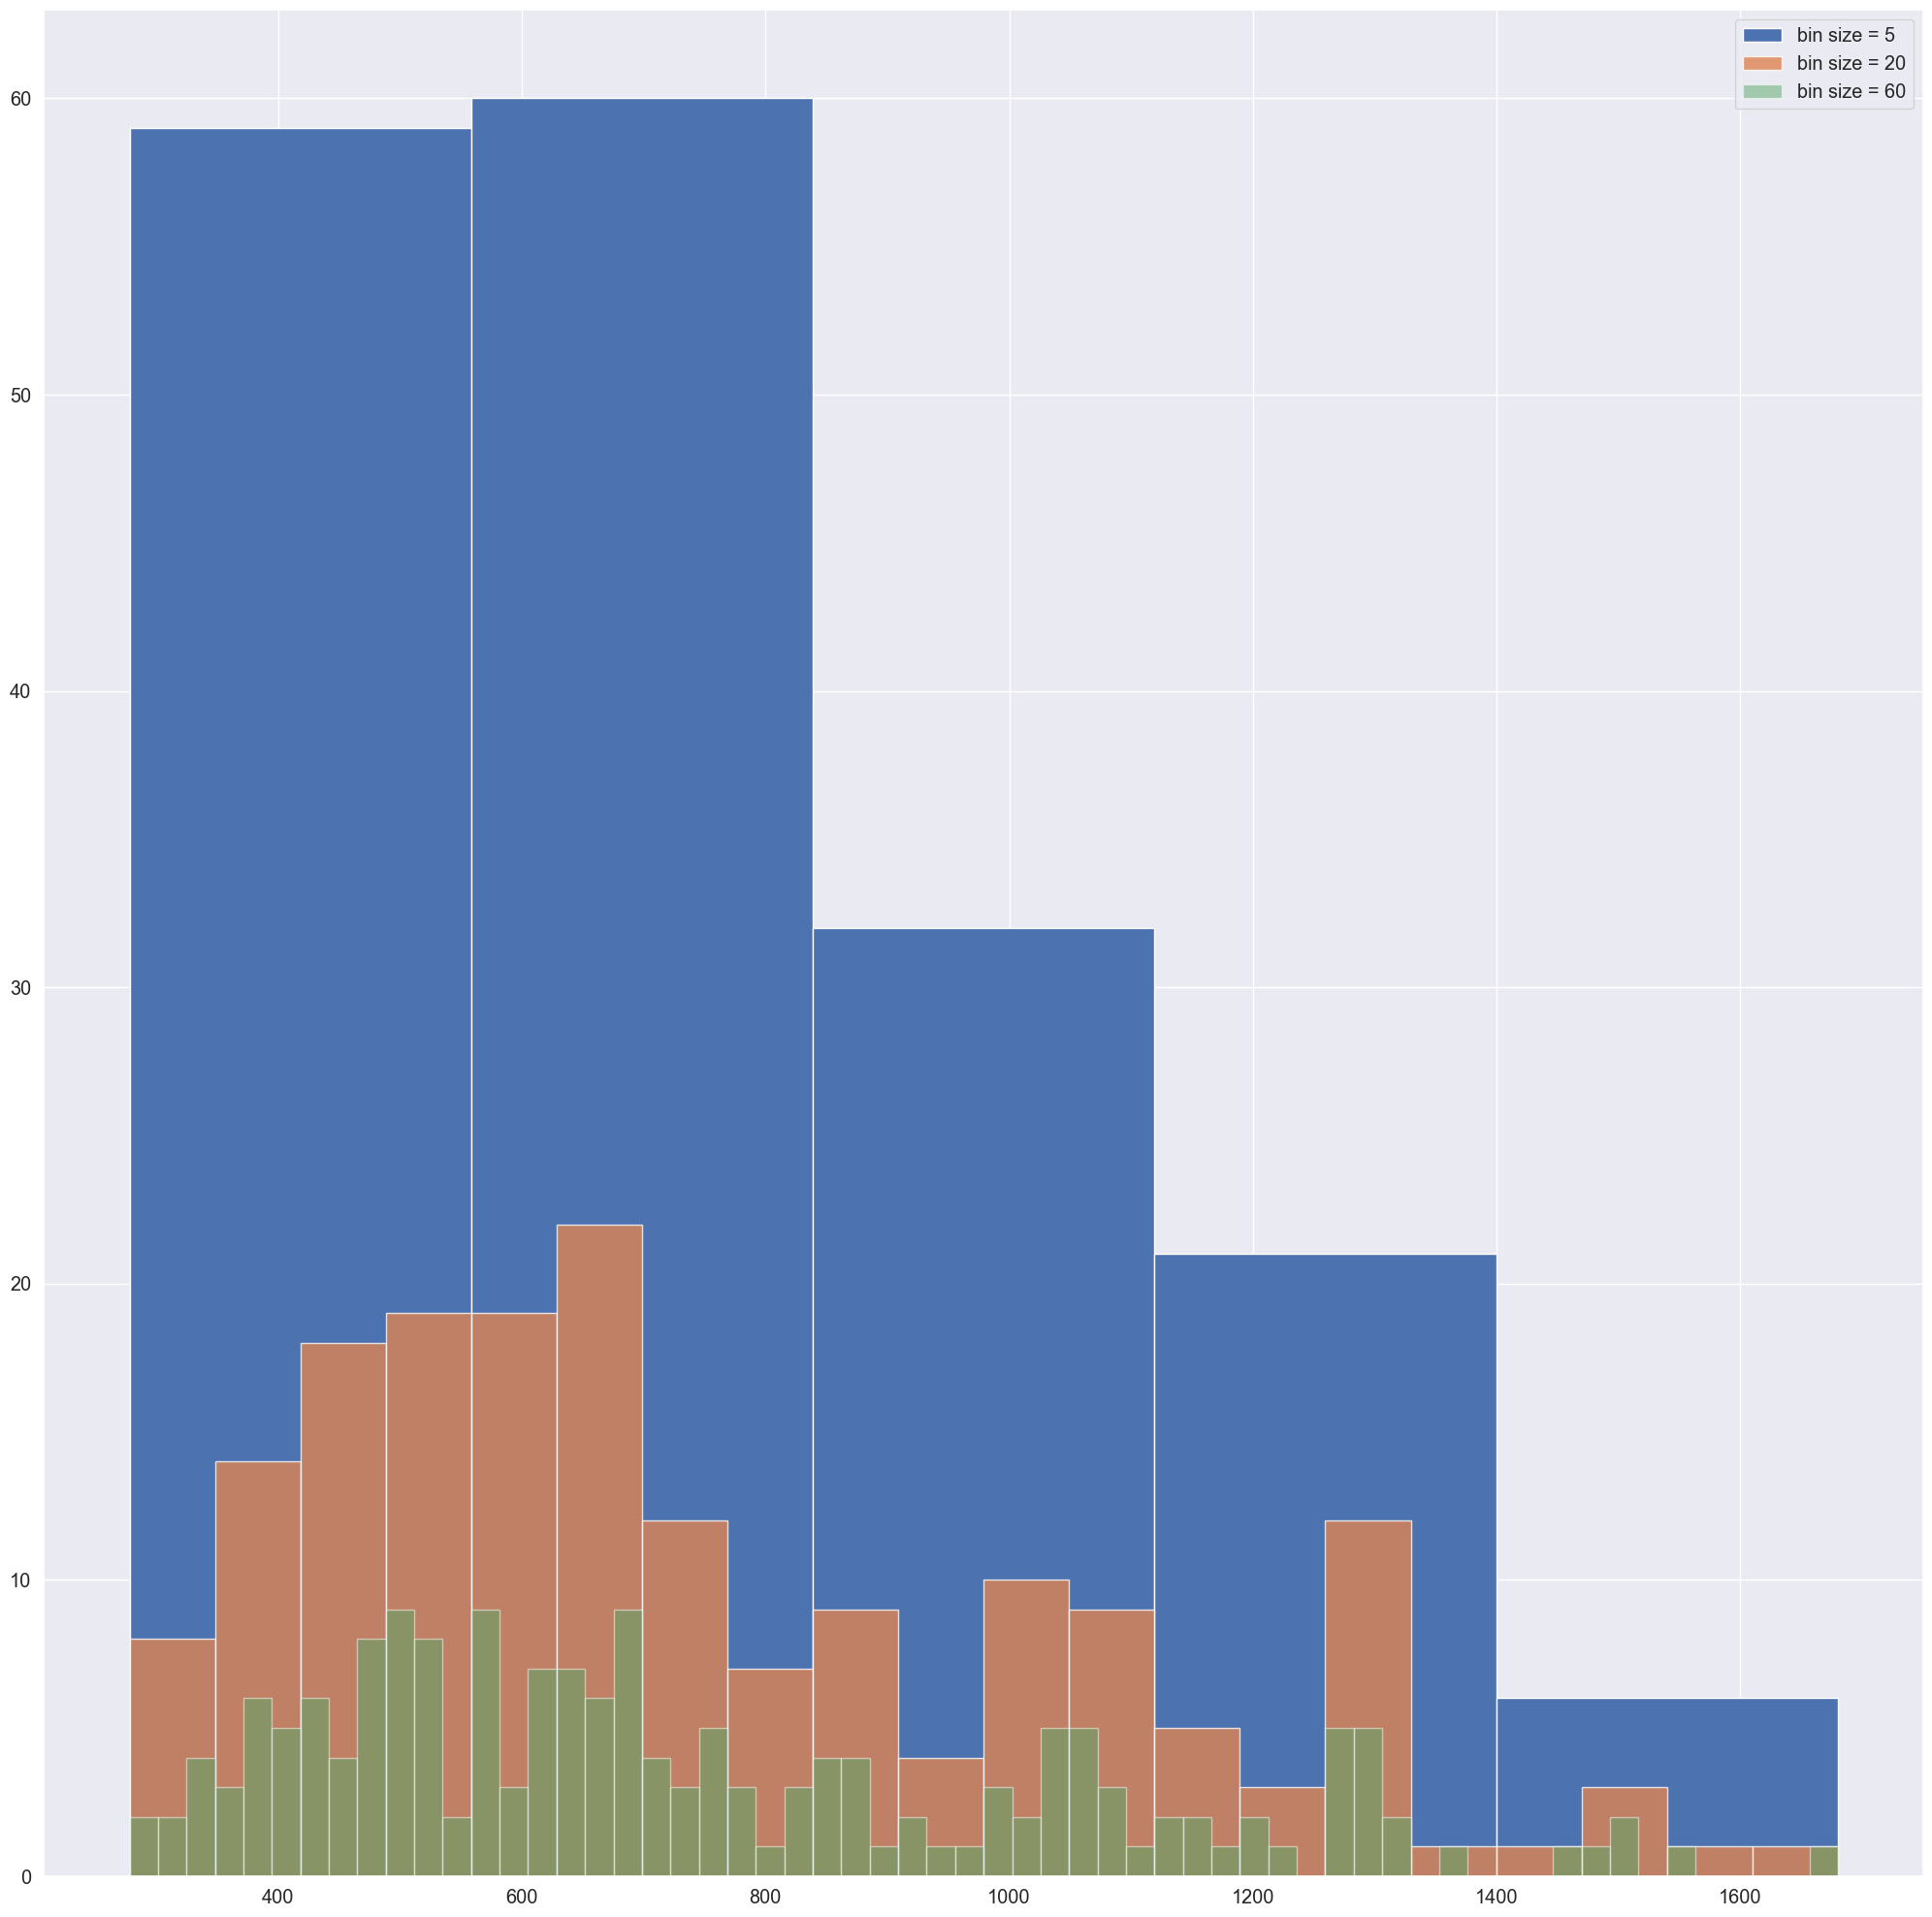

In [8]:
# beware that (bin) size does matter! 
# 'play' a bit with bin sizes to see the differences and the best fitting size (or you might miss patterns in the data)
plt.hist([winedata['proline']], bins= 5, alpha=1, label='bin size = 5')
plt.hist([winedata['proline']], bins= 20, alpha=0.8, label='bin size = 20')
plt.hist([winedata['proline']], bins= 60, alpha=0.5, label='bin size = 60')
plt.legend(loc='upper right')
plt.show()

Understanding / Preparing (see the corelation to the target variable....)

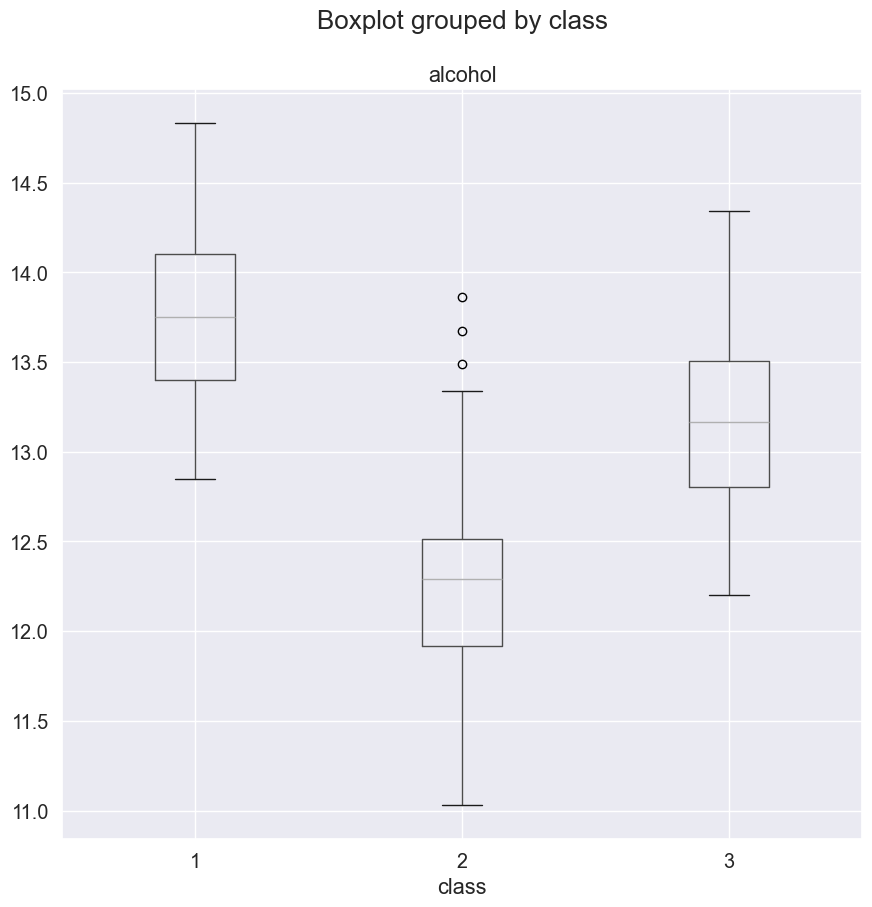

In [9]:
winedata.boxplot(column='alcohol', by='class', figsize=(10,10));

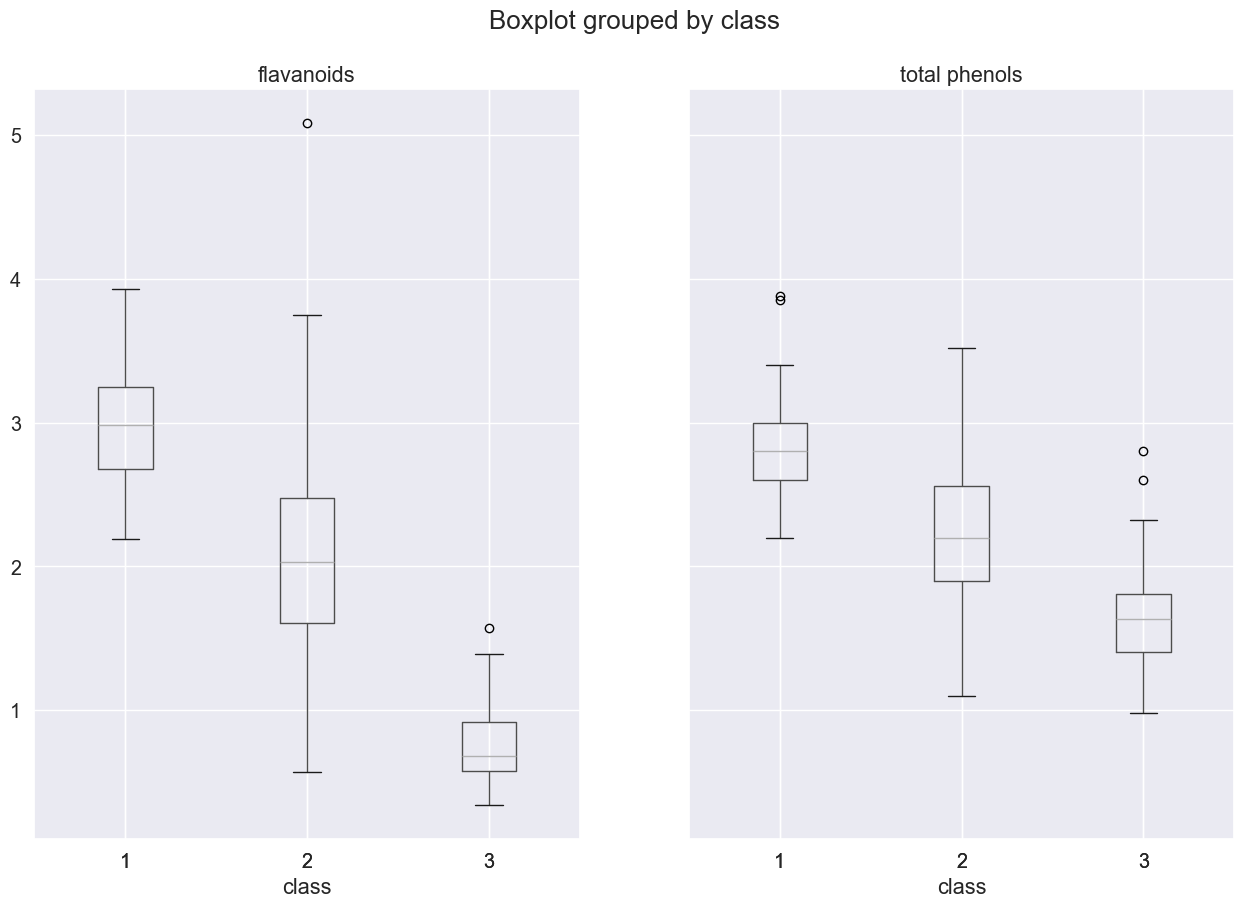

In [10]:
#to show the impact of value ranges, we'll plot 2 features in a boxplot.
#select the vlaues of 2 columns
wine_features = tuple(winedata.columns[[7, 6]].values)
winedata.boxplot(column=wine_features, by='class', figsize=(15,10));

It is clearly visible in the boxplots above, that scaling is required to compare features (visually, but it can also have an impact at the model).

<Axes: xlabel='alcohol', ylabel='proline'>

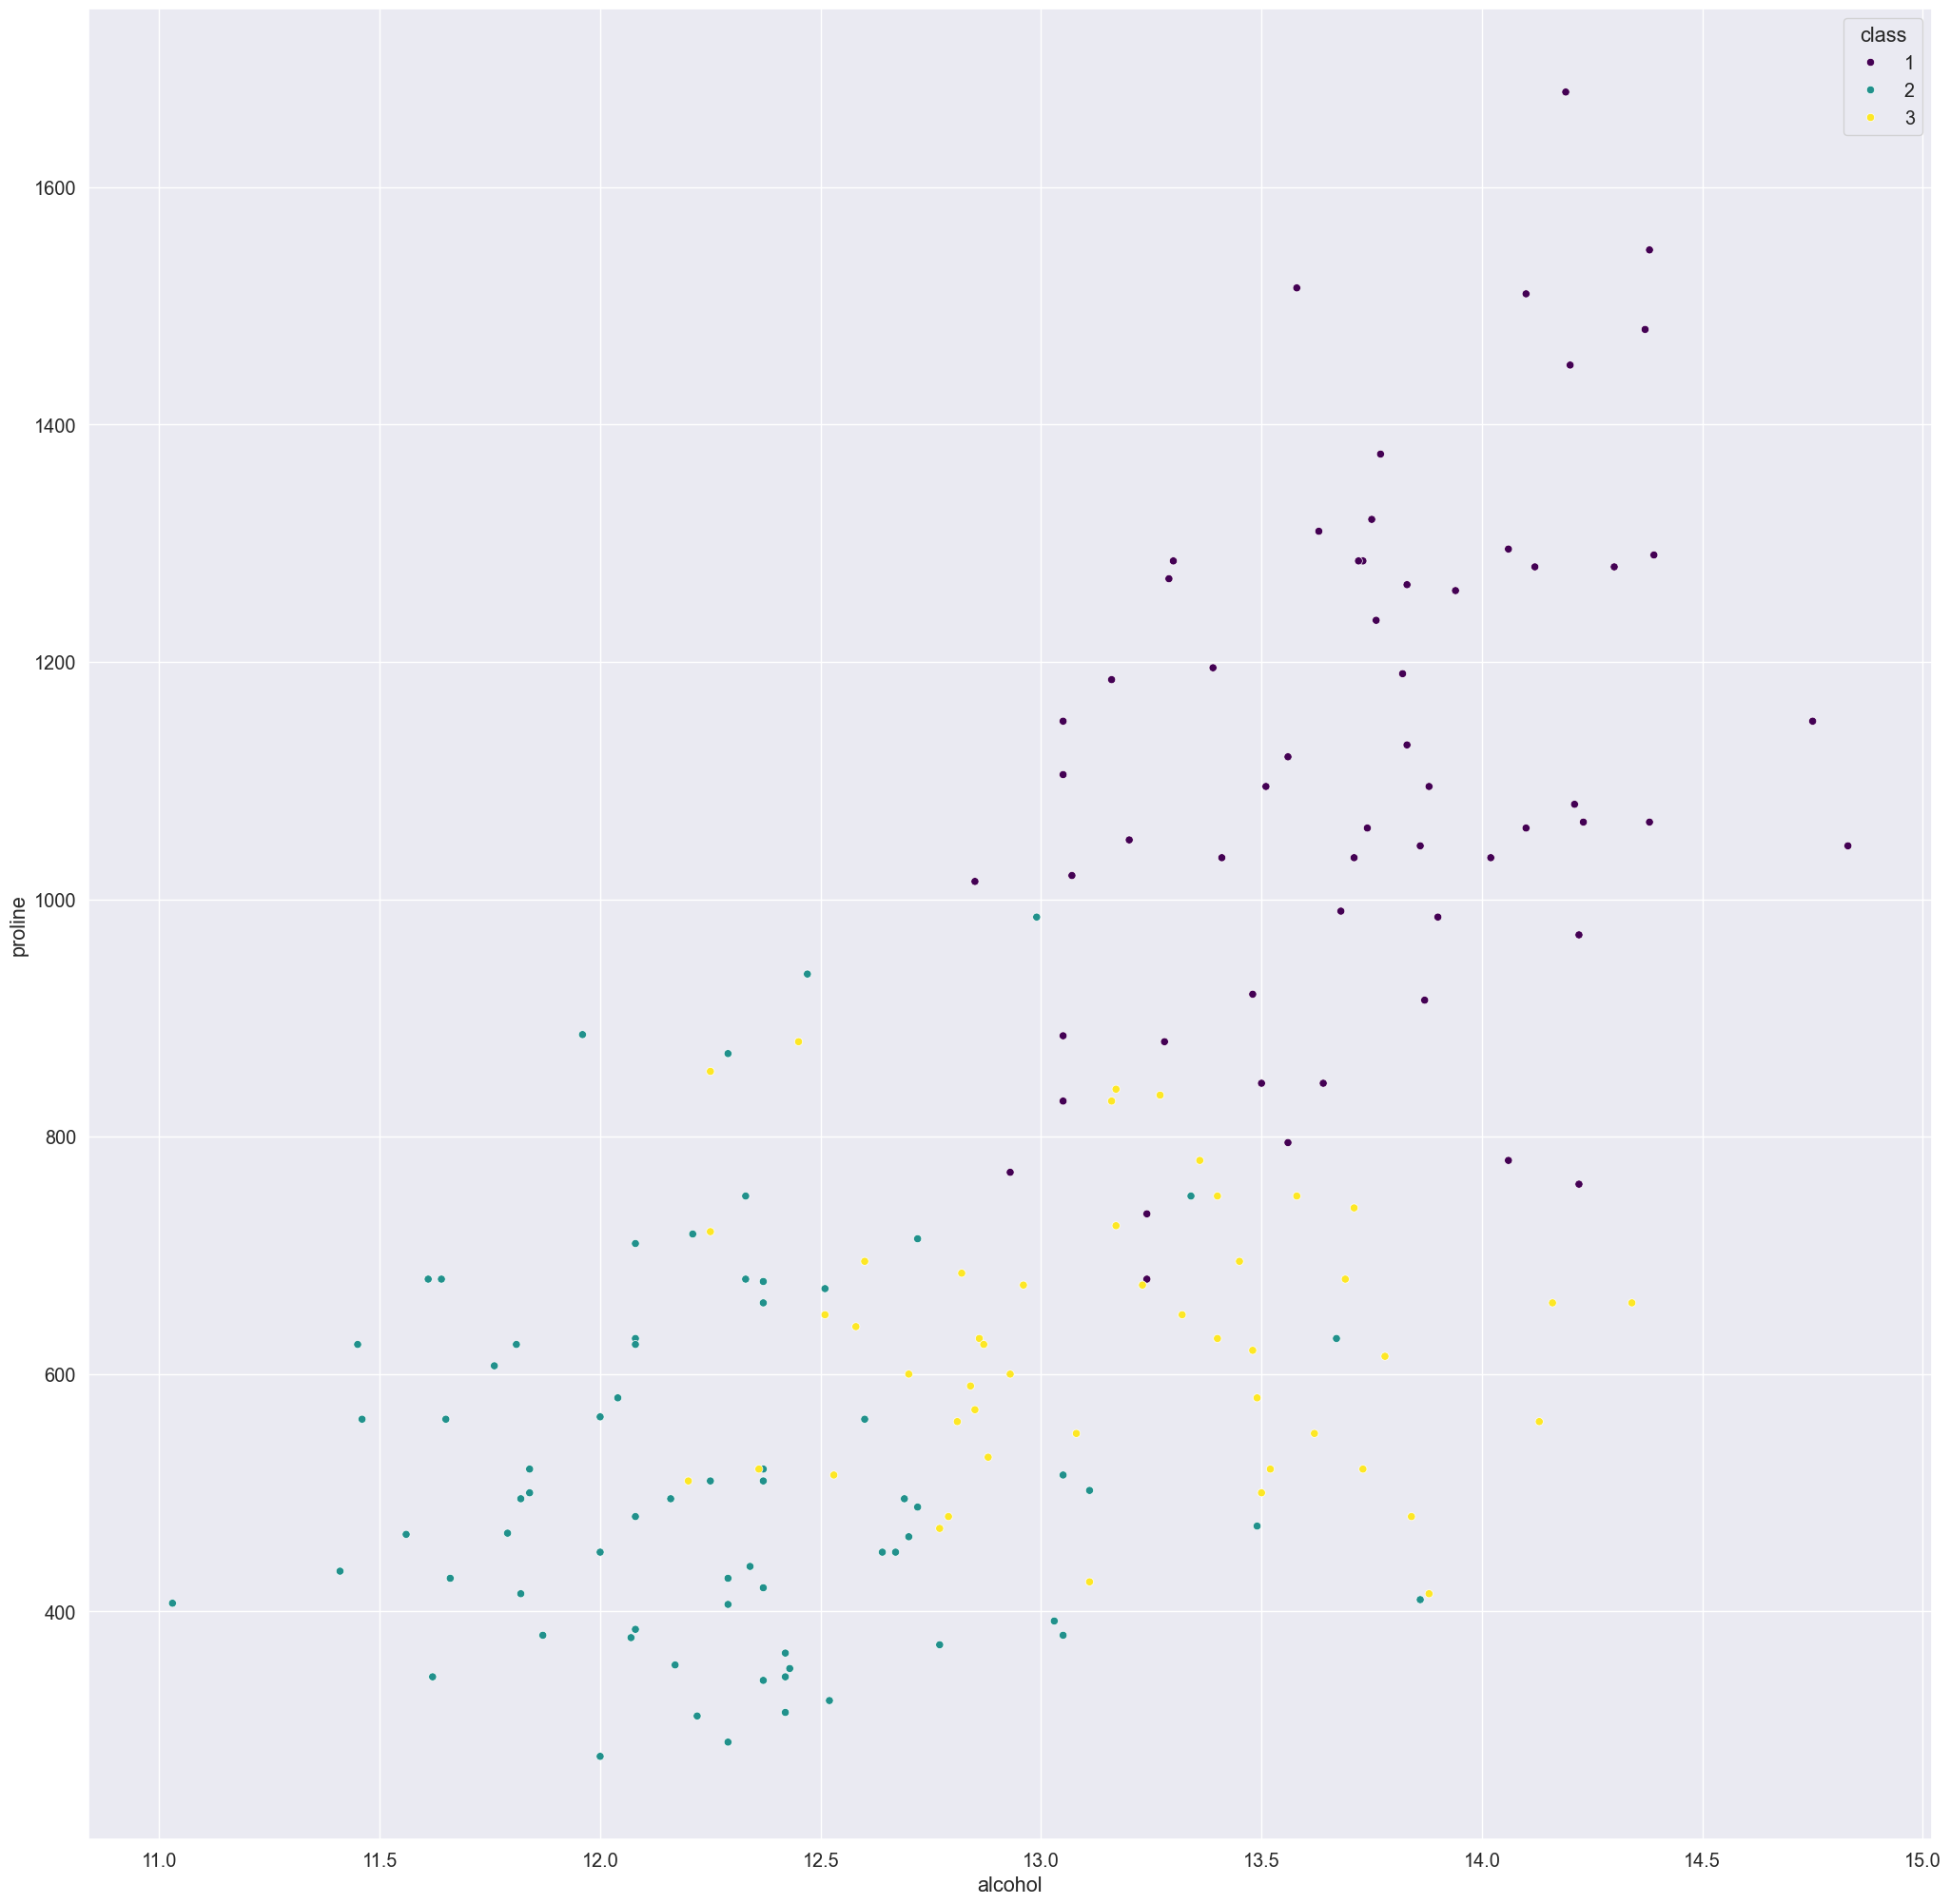

In [11]:
# scatterplots can be used to combine an dplot several features as datapoints (ideally numerical) to see patterns 
sns.scatterplot(data=winedata, x='alcohol', y='proline', hue='class', palette='viridis', sizes=44)

In the scatterplot above you can see that using the alcohol and proline feature already gives a first impression
of the clusters of datapoints per class. 

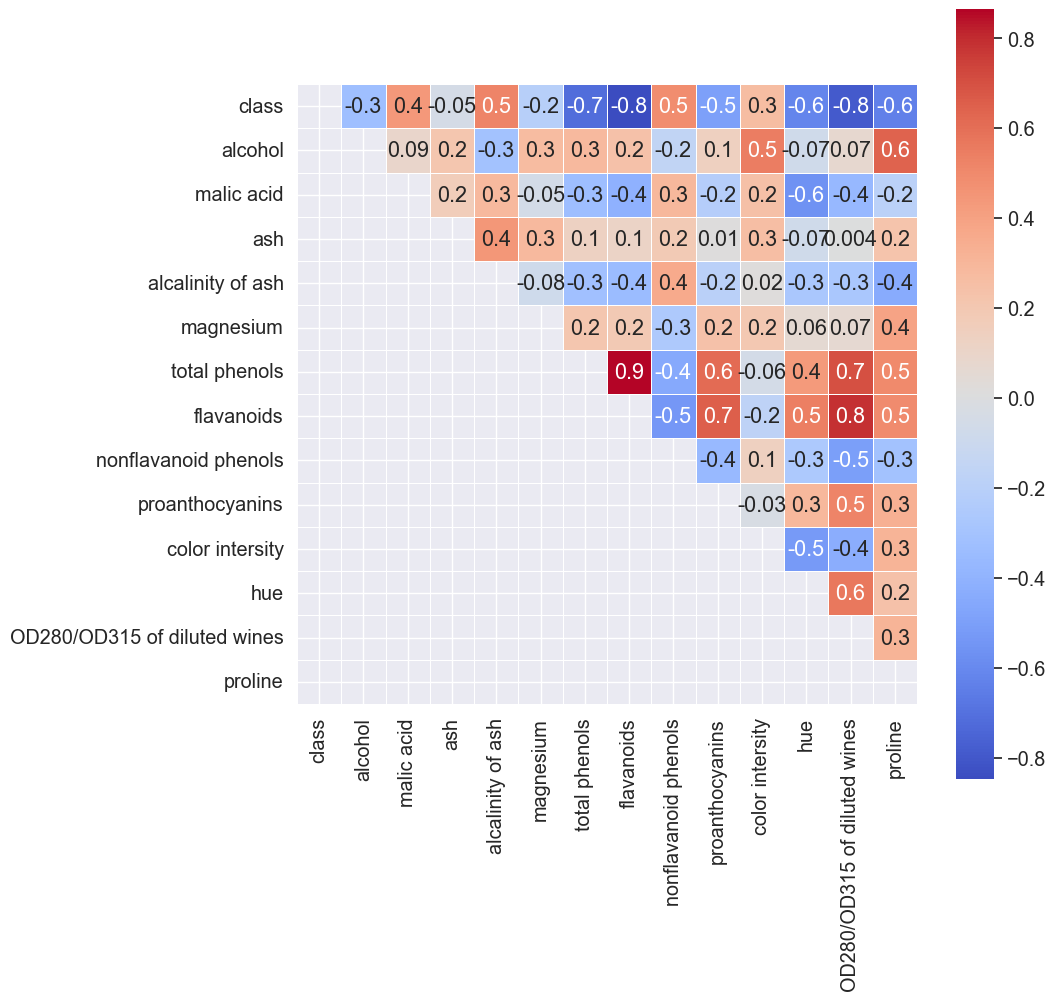

In [12]:
plt.figure(figsize=(10, 10))
# to leave out double values in the matrix, you can create a maskfor  the lower half of the matrix
mask = np.tril(winedata.corr())
#create a correlation matrix, specificing the color scheme, displaying the values in the cells, ...
# check https://seaborn.pydata.org/generated/seaborn.heatmap.html for all parameters and settings.
sns.heatmap(winedata.corr(), cmap="coolwarm", annot=True, fmt='.1g', linewidth=.5, square=True, mask=mask);

A correlation matrix can be very convenient to (quickly) see or show the correlation between features. This might help to select features, but also to rule out coincidental relations: having a high correlation might be useful and help you to understand the data and context, it can also mean you are looking at similar aspects, without any real added value or new information (e.g. age and data of birth, or price and VAT... ).

In this case the high correlation values related to the class variable indicate useful features to include in the modelling phase. In addition to the visual exploration of features also revealed, phenols and flavanoids are potentially good features to use in the Nearest Neighbour model.  

## Data Preparation
in this notebook I will keep this section very limited. The data is numerical, which makes it suitable as input to train the kNN model. Missing or corrupt values might cause issues in the modelling phase, so I'll (quickly0 check this:

In [13]:
# are there any empty (missing) values? Keep in mind that N/A or null is not the only way to have missing values..
winedata.isnull().sum()

#you might check for 0 or '' values as well -> (winedata==0).sum()


class                           0
alcohol                         0
malic acid                      0
ash                             0
alcalinity of ash               0
magnesium                       0
total phenols                   0
flavanoids                      0
nonflavanoid phenols            0
proanthocyanins                 0
color intersity                 0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

There are no null values in the data. In the EDA section we have already looked for odd or incorrect values, such as negative or extreme values. So in short, I conclude the data is okay to use for modelling and we can proceed to the next phase (3). 

 ## Rating
 To complete this exercise you can use the rating table below to assess this notebook using the 3 AI learning outcomes:
 
 
 <div class="alert alert-block alert-success">
    <table><tr><td>
        <b>Learning outcome</b></td>
        <td><b>Rating (*)</b> </td></tr>   
    <tr><td> 1. Data Preparation and Analysis</td>
        <td> Orienting, because there has only been use of 1 dataseta and there is little evedance of outliers  </td></tr>  
    <tr><td> 2. Model Engineering</td>
        <td> Beginning, because the writer is capable of making readable and understandable diagrams  </td></tr>
    <tr><td> 3. Explainable AI</td>
        <td> Orienting, there has been little talk in this document.  </td></tr>
    </table>
    
    (*) ratings: Advanced, Proficient, Beginning, Orienting or Undefined
</div>


 